In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from xgboost import XGBClassifier
from xgboost import plot_importance  

# Selection model
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,StratifiedKFold 

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def evalua(y_pred,y_test):
    
    # Evaluate of predictions 
    accuracy = accuracy_score(y_test, y_pred) 
    roc = roc_auc_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    # Data test results
    print('Evaluation of predictions: \n')
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Area ROC: %.2f%%" % (roc * 100.0))
    print("F1 Score: %.2f%%" % (f1 * 100.0))

In [3]:
original = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',"Data")

## Features are detailed below:

* Age: Customer's age
* Experience: Number of years of professional experience
* Income: Annual income of the customer
* ZIPCode: Home Address ZIP code
* Family: Family size of the customer
* CCAvg: Average spending on credit cards per month
* Education: 1: Undergrade; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* CreditCard: Does the customer uses a credit card issued by UniversalBank?
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?

In [4]:
original.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df = original
df.drop(['ID'],axis = 1, inplace = True)
x = df.drop(['Personal Loan'], axis = 1)
y = df['Personal Loan']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [8]:
# Grid Search 
model = XGBClassifier() 

learning_rate = [0.01, 0.1, 0.2] 
max_depth=[6]
booster=['gbtree']
n_estimators=[100]
nthread=[6]
min_child_weight=[1,5,10,20,30]

param_grid = dict(min_child_weight=min_child_weight,nthread=nthread,learning_rate=learning_rate,max_depth=max_depth,booster=booster,n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7) 
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs = 10, cv=kfold) 
grid_result = grid_search.fit(x_train, y_train)

In [9]:
# Summarize results   
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']

Best: 0.990448 using {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': 6}


Evaluation of predictions: 

Accuracy: 97.70%
Area ROC: 91.94%
F1 Score: 87.58%


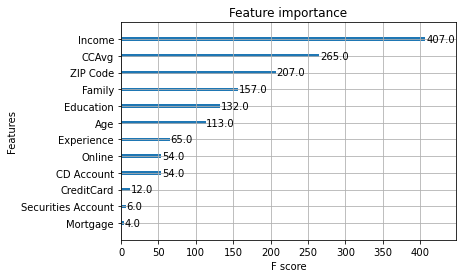

In [10]:
# Evaluate of predictions 
model_best = grid_search.best_estimator_
y_pred=model_best.predict(x_test)
evalua(y_pred,y_test)

# Plot feature importance 
plot_importance(model_best) 
plt.show()

In [11]:
# Classification report
print('Classification Report:\n')
print(classification_report(y_test, y_pred),'\n')

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1492
           1       0.91      0.85      0.88       158

    accuracy                           0.98      1650
   macro avg       0.94      0.92      0.93      1650
weighted avg       0.98      0.98      0.98      1650
 



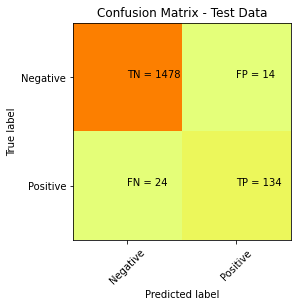

In [12]:
# Confusion matrix
cm =confusion_matrix(y_test,y_pred)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [22]:
def preda(x):
    #df2 = df.loc[(df['id'] == x)].drop(columns = ['Personal Loan','id'], axis=1)
    model_best = grid_search.best_estimator_
    y_pred=model_best.predict(x)
    if(y_pred==0):
        return 0
    else:
        return 1

In [14]:
df['id'] = np.arange(len(df))
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,id
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,2
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,3
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,4995
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,4996
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,4997
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,4998


In [15]:
df.loc[df['Personal Loan'] == 1]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,id
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,9
16,38,14,130,95010,4,4.7,3,134,1,0,0,0,0,16
18,46,21,193,91604,2,8.1,3,0,1,0,0,0,0,18
29,38,13,119,94104,1,3.3,2,0,1,0,1,1,1,29
38,42,18,141,94114,3,5.0,3,0,1,1,1,1,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,13,129,92646,3,4.1,3,0,1,0,1,1,1,4883
4927,43,19,121,94720,1,0.7,2,0,1,0,1,1,1,4927
4941,28,4,112,90049,2,1.6,2,0,1,0,0,1,0,4941
4962,46,20,122,90065,3,3.0,3,0,1,0,1,1,1,4962


In [16]:
#preda(38)

ValueError: Feature shape mismatch, expected: 12, got 14

In [17]:
df1 = pd.DataFrame({"Age":[0],"Experience":[0],"Income":[0],"ZIP Code":[0],"Family":[0],"CCAvg":[0],"Education":[0],"Mortgage":[0],"Securities Account":[0],"CD Account":[0],"Online":[0],"CreditCard":[0]})

In [18]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# to append df2 at the end of df1 dataframe
df.append(df1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,id
0,25,1,49,91107,4,1.6,1,0,0.0,1,0,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,0.0,1,0,0,0,1.0
2,39,15,11,94720,1,1.0,1,0,0.0,0,0,0,0,2.0
3,35,9,100,94112,1,2.7,2,0,0.0,0,0,0,0,3.0
4,35,8,45,91330,4,1.0,2,0,0.0,0,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,30,4,15,92037,4,0.4,1,85,0.0,0,0,1,0,4996.0
4997,63,39,24,93023,2,0.3,3,0,0.0,0,0,0,0,4997.0
4998,65,40,49,90034,3,0.5,2,0,0.0,0,0,1,0,4998.0
4999,28,4,83,92612,3,0.8,1,0,0.0,0,0,1,1,4999.0


In [23]:
preda(df1)

0

In [25]:
import pickle

In [27]:
pickle.dump(grid_search,open('grid_search.pkl','wb'))